In [1]:
%reset -f
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = 400.0
def sqexp(x1, x2):
    return np.exp(-0.5*(x1-x2)**2/s)

In [3]:
X = [0.0, 0.5, 1.0]
Y = [1.0, 0.5, 1.0]

XXabsdiff = np.array([[0.0, 0.5, 1.0],
                      [0.5, 0.0, 0.5],
                      [1.0, 0.5, 0.0]])
KXX = np.exp(-0.5*(XXabsdiff**2)/s)
print "KXX\n", KXX
sn = 300  # large noise
print "std", sqrt(sn)
xstar = 0.49999
KXXstar = np.array([sqexp(xstar, X[0]), sqexp(xstar, X[1]), sqexp(xstar, X[2])])
print "KXXstar\n", KXXstar

KXX
[[ 1.          0.99968755  0.99875078]
 [ 0.99968755  1.          0.99968755]
 [ 0.99875078  0.99968755  1.        ]]
std 17.3205080757
KXXstar
[ 0.99968756  1.          0.99968754]


In [4]:
A = KXX + sn*np.eye(3)
print "A\n", A
Ainv = np.linalg.inv(A)
print "Ainv\n", Ainv
B = KXXstar.dot(Ainv)
print "B\n", B
print "B.dot(KXXstar.transpose())\n", B.dot(KXXstar.transpose())
cov = sqexp(xstar, xstar) - B.dot(KXXstar.transpose())

A
[[ 301.            0.99968755    0.99875078]
 [   0.99968755  301.            0.99968755]
 [   0.99875078    0.99968755  301.        ]]
Ainv
[[  3.32233212e-03  -1.09977081e-05  -1.09873340e-05]
 [ -1.09977081e-05   3.32233219e-03  -1.09977081e-05]
 [ -1.09873340e-05  -1.09977081e-05   3.32233212e-03]]
B
[ 0.00329931  0.00330034  0.00329931]
B.dot(KXXstar.transpose())
0.00989690678296


In [5]:
print cov
print sqrt(cov)

0.990103093217
0.995039242049


noise_var 100.0 !!!!!!!!!!!!!!!!!!!!!!!!!


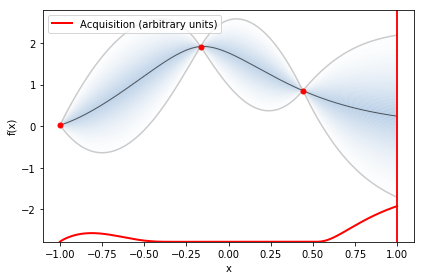

x_opt [-0.99977125]
fx_opt [ 0.02353582]

Name : GP regression
Objective : 4.5131249086
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  Mat32.variance           |      1.31173994275  |      +ve      |        
  Mat32.lengthscale        |     0.562991415793  |      +ve      |        
  Gaussian_noise.variance  |  2.83480496901e-07  |      +ve      |        


In [7]:
import GPy
import GPyOpt
from numpy.random import seed

# A function to optimize (a shifted quadratic; used for illustrative purposes).
def myfunction(x):
    return cos(2*x)+cos(5*x)+cos(30*x) + 0.1*rand()

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]
seed(1)
myProblem = GPyOpt.methods.BayesianOptimization(
    myfunction,domain=bounds,
    initial_design_numdata=3,normalize_Y=False,noise_var=100.0,verbose=True)
myProblem.plot_acquisition()
print 'x_opt', myProblem.x_opt
print 'fx_opt', myProblem.fx_opt
print myProblem.model.model